In [1]:
from bioservices import *
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
u = UniProt()

In [13]:
res = u.search("Q6DD18_XENLA")
print(res)


Entry	Entry name	Status	Protein names	Gene names	Organism	Length
Q6DD18	Q6DD18_XENLA	unreviewed	Nars-prov protein	nars nars-prov	Xenopus laevis (African clawed frog)	559



In [3]:
print u.search('zap70+AND+organism:9606', frmt='tab', limit=3,
               columns="entry name, length, genes")


Entry name	Length	Gene names
ZAP70_HUMAN	619	ZAP70 SRK
EGFR_HUMAN	1210	EGFR ERBB ERBB1 HER1
LCK_HUMAN	509	LCK



In [4]:
u.debugLevel = "INFO"
u.timeout = 10   # some queries are long and requires much more time; default is 1000 seconds

In [14]:
df = u.get_df(["ZAP70_HUMAN", "GRAB_HUMAN", "JUN_HUMAN", "MK15_HUMAN"])
df

,Entry,Entry name,Gene names,Gene names (primary ),Gene names (synonym ),Gene names (ordered locus ),Gene names (ORF ),Organism,Organism ID,Protein names,...,Miscellaneous [CC],Keywords,Protein existence,Status,Sequence annotation (Features),Protein families,Version,Comments,Cross-reference,Pathway.1
0,Q8TD08,MK15_HUMAN,[MAPK15 ERK7 ERK8],MAPK15,ERK7 ERK8,NaN,NaN,Homo sapiens (Human),9606,Mitogen-activated protein kinase 15 (MAP kinas...,...,NaN,"[ATP-binding, Alternative splicing, Complete p...",Evidence at protein level,reviewed,NaN,"[Protein kinase superfamily, CMGC Ser/Thr prot...",126,"[Alternative products (1), Catalytic activity ...",NaN,NaN
1,Q6DD18,Q6DD18_XENLA,[nars nars-prov],nars,nars-prov,NaN,NaN,Xenopus laevis (African clawed frog),8355,Nars-prov protein,...,NaN,"[ATP-binding, Aminoacyl-tRNA synthetase, Coile...",Evidence at transcript level,unreviewed,NaN,[Class-II aminoacyl-tRNA synthetase family],78,[Sequence similarities (1)],NaN,NaN
2,P10144,GRAB_HUMAN,[GZMB CGL1 CSPB CTLA1 GRB],GZMB,CGL1 CSPB CTLA1 GRB,NaN,NaN,Homo sapiens (Human),9606,Granzyme B (EC 3.4.21.79) (C11) (CTLA-1) (Cath...,...,NaN,"[3D-structure, Apoptosis, Complete proteome, C...",Evidence at protein level,reviewed,NaN,"[Peptidase S1 family, Granzyme subfamily]",181,"[Catalytic activity (1), Enzyme regulation (1)...",NaN,NaN
3,P05412,JUN_HUMAN,[JUN],JUN,NaN,NaN,NaN,Homo sapiens (Human),9606,Transcription factor AP-1 (Activator protein 1...,...,NaN,"[3D-structure, Acetylation, Activator, Complet...",Evidence at protein level,reviewed,NaN,"[BZIP family, Jun subfamily]",211,"[Function (1), Post-translational modification...",NaN,NaN


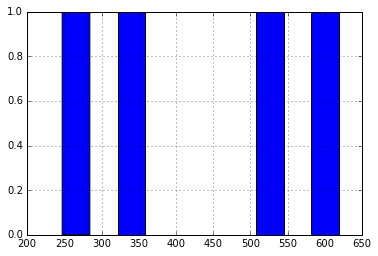

In [7]:
df['Length'].hist()

In [15]:
sequence = u.retrieve("P43403", "fasta")

In [16]:
print(sequence)

>tr|Q6DD18|Q6DD18_XENLA Nars-prov protein OS=Xenopus laevis GN=nars PE=2 SV=1
MEEEINDITARLKLEEMYISDREGNDSTGDGTKEKPFKTILKAMLVAGKEPFPTFYVDSQ
KENERWDVISKSQVKNNRKLWVREQMKNEAKEKKEAEDNLRREKNLEDAKKIIISNDPSL
PAPVTLKIRELEAYRGQRVKVFGWVHRLRRQGKNLMFIVLRDGTGYLQCVLSDQLCQCYN
GLVLSTESTVAVYGTLNLVPDGKQAPGGHELACDYWELVGLAPAGGADNLLNEESDVDVQ
LNNRHMMIRGENMSKIFKVRSTVIHCFRNHFFDRGYYEVTPPTLVQTQVEGGSTLFKLDY
FGEEAYLTQSSQLYLETCIPALGDSFCIAQSYRAEQSRTRRHLAEYTHIEAECPFMTFEN
LLERLEDLVCDVVDRVLKSPVASLLYDLHPEFKPPKRPFRRMNYSEAITWLKEHDVKKDD
GTYYEFGEDIPEAPERLMTDAINEPILLCRFPAEIKSFYMQRCAEDKRLTESVDVLMPNV
GEIVGGSMRIWDSEELLEGYKREEIDPTPYYWYTDQRKYGTCPHGGYGLGLERFLTWILN
RHHIRDVCLYPRFVQRCKP



In [10]:
u.get_fasta_sequence("P43403")

Will be moved to BioKit github.com/biokit


u'MPDPAAHLPFFYGSISRAEAEEHLKLAGMADGLFLLRQCLRSLGGYVLSLVHDVRFHHFPIERQLNGTYAIAGGKAHCGPAELCEFYSRDPDGLPCNLRKPCNRPSGLEPQPGVFDCLRDAMVRDYVRQTWKLEGEALEQAIISQAPQVEKLIATTAHERMPWYHSSLTREEAERKLYSGAQTDGKFLLRPRKEQGTYALSLIYGKTVYHYLISQDKAGKYCIPEGTKFDTLWQLVEYLKLKADGLIYCLKEACPNSSASNASGAAAPTLPAHPSTLTHPQRRIDTLNSDGYTPEPARITSPDKPRPMPMDTSVYESPYSDPEELKDKKLFLKRDNLLIADIELGCGNFGSVRQGVYRMRKKQIDVAIKVLKQGTEKADTEEMMREAQIMHQLDNPYIVRLIGVCQAEALMLVMEMAGGGPLHKFLVGKREEIPVSNVAELLHQVSMGMKYLEEKNFVHRDLAARNVLLVNRHYAKISDFGLSKALGADDSYYTARSAGKWPLKWYAPECINFRKFSSRSDVWSYGVTMWEALSYGQKPYKKMKGPEVMAFIEQGKRMECPPECPPELYALMSDCWIYKWEDRPDFLTVEQRMRACYYSLASKVEGPPGSTQKAEAACA'

In [11]:
u.mapping("ACC", "KEGG_ID", 'P43403')

defaultdict(list, {u'P43403': [u'hsa:7535']})

In [12]:
u.mapping("ID", "PDB_ID", "P43403")

defaultdict(list,
            {u'P43403': [u'1FBV',
              u'1M61',
              u'1U59',
              u'2CBL',
              u'2OQ1',
              u'2OZO',
              u'2Y1N',
              u'3ZNI',
              u'4A4B',
              u'4A4C',
              u'4K2R',
              u'4XZ0',
              u'4XZ1']})